In [1]:
## Studnet ID: 20759072


## question 3 a
import numpy as np


## hyperparam

n = 50
dimension_list = [x+10 for x in range(491)]
mean, sigma = 0, 1 # mean and standard deviation



In [2]:
## for each dimension, we have X, Y and mu

dataset_dimension = []


for dimension in dimension_list:
  # print(dimension)
  X_data = []
  Y_data = []
  mu = np.zeros(dimension)
  for i in range(n):
    x_i = np.random.normal(mean, sigma, dimension)
    y_i = np.random.normal(mean, sigma, dimension)
    X_data.append(x_i)
    Y_data.append(y_i)
    mu = np.add(mu, x_i)  
  mu = mu / n
  dimension_data = [X_data, Y_data, mu]
  dataset_dimension.append(dimension_data)


In [3]:
print(len(dataset_dimension[0][0]))

50


In [4]:
threadshold_list = []
accuracy_in_dimension = []

def find_threadshold(X_dataset, Y_dataset, mu):
  possible_threadshold = []

  Z_dataset = X_dataset + Y_dataset
  # print("len of Z:" , len(Z_dataset))
  # print("dimension of Z:" , len(Z_dataset[0]))
  for data in Z_dataset:
    possible_threadshold.append(np.dot(data, mu))

  best_count =0
  best_threadshold = -1

  for threadshold in possible_threadshold:
    count_correct = 0
    for i in range(len(Z_dataset)):
      z_data = Z_dataset[i]
      if np.dot(z_data, mu) >= threadshold and i < 50 or np.dot(z_data, mu) < threadshold and i >= 50:
        count_correct += 1
    if count_correct > best_count:
      best_count = count_correct
      best_threadshold = threadshold
  # print(best_threadshold)
  return best_threadshold, best_count / 100


for dataset in dataset_dimension:
  threadshold, accuracy = find_threadshold(dataset[0], dataset[1], dataset[2])
  accuracy_in_dimension.append(accuracy)
  # print(threadshold)
  threadshold_list.append(threadshold)

In [5]:
# print(threadshold)

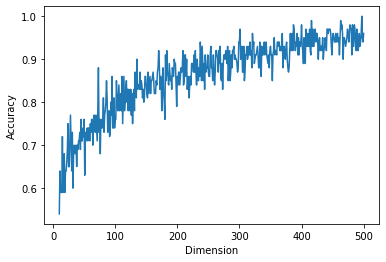

In [6]:
import matplotlib.pyplot as plt

plt.plot(dimension_list, accuracy_in_dimension)
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
# plt.axis([10, 500, 0, 1])

plt.show()



In [7]:
## Generate new data and plot
## for each dimension, we have X, Y and mu

## Used hreadshold_list 

# dataset_dimension = []
new_data_accuracy = []

def find_accuracy(X_dataset, Y_dataset, mu, threadshold):
  # possible_threadshold = []

  Z_dataset = X_dataset + Y_dataset

  count_correct = 0
  for i in range(len(Z_dataset)):
    z_data = Z_dataset[i]
    if np.dot(z_data, mu) >= threadshold and i < 50 or np.dot(z_data, mu) < threadshold and i >= 50:
      count_correct += 1

  return count_correct / 100


for i in range(len(dimension_list)):
  dimension = dimension_list[i]
  # print(i)
  cur_threadshold = threadshold_list[i]
  # print(dimension)
  X_data = []
  Y_data = []
  mu = np.zeros(dimension)
  for i in range(n):
    x_i = np.random.normal(mean, sigma, dimension)
    y_i = np.random.normal(mean, sigma, dimension)
    X_data.append(x_i)
    Y_data.append(y_i)
    mu = np.add(mu, x_i)  
  mu = mu / n
  new_data_accuracy.append(find_accuracy(X_data, Y_data, mu, cur_threadshold))




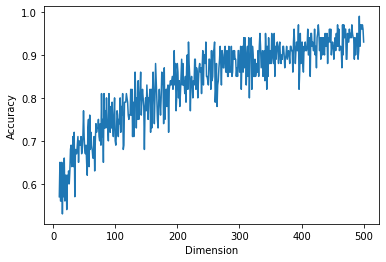

In [8]:
import matplotlib.pyplot as plt

plt.plot(dimension_list, new_data_accuracy)
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
# plt.axis([10, 500, 0, 1])

plt.show()



In [32]:
dataset_50d = dataset_dimension[40]

X_data_var = dataset_50d[0]
Y_data_var = dataset_50d[1]
mu_var = dataset_50d[2]

variance_list = [0.1 * (x+1) for x in range(10)]
# print(variance_list)

best_acc = [0 for i in range(10)]
mu_with_different_variance_cum = np.zeros(10)

for i in range(1000):
  if i % 100 == 0:
    print(i)

  mu_with_different_variance = []

  for variance in variance_list:
    var = np.random.normal(mean, sigma * variance, 50)
    temp_mu = np.add(mu_var, var)
    mu_with_different_variance.append(temp_mu)

  # var_accuracy_list = []
  # count = 0
  for k in range(len(mu_with_different_variance)):
    mu_each_var = mu_with_different_variance[k]

    _, var_accuracy = find_threadshold(X_data_var, Y_data_var, mu_each_var)
    # print(k)
    best_acc[k] += var_accuracy
    l2_mu_approx = np.linalg.norm(mu_each_var, ord=2)
    # print(l2_mu_approx)
    mu_with_different_variance_cum[k] = mu_with_different_variance_cum[k] + l2_mu_approx

  # var_accuracy_list.append(var_accuracy

0
100
200
300
400
500
600
700
800
900


In [31]:
print(best_acc)

[1.48, 1.5, 1.4, 1.41, 1.27, 1.3599999999999999, 1.3399999999999999, 1.29, 1.21, 1.27]


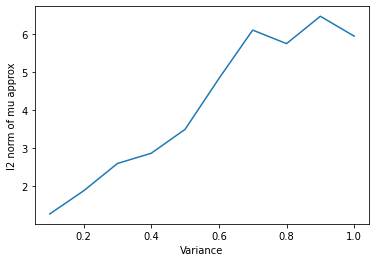

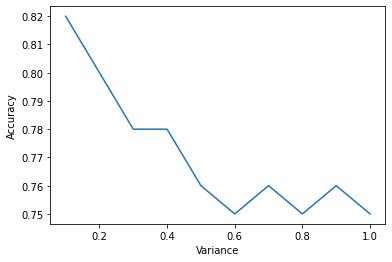

In [33]:

best_acc_plot = [x/1000 for x in best_acc]
mu_with_different_variance_cum_plot = [x/1000 for x in mu_with_different_variance_cum]


plt.plot(variance_list, mu_with_different_variance_cum_plot)
plt.xlabel('Variance')
plt.ylabel('l2 norm of mu approx')
# plt.axis([10, 500, 0, 1])

plt.show()

plt.plot(variance_list, best_acc_plot)
plt.xlabel('Variance')
plt.ylabel('Accuracy')
# plt.axis([10, 500, 0, 1])

plt.show()


In [12]:
from tensorflow.keras import layers, Model, Sequential
from tensorflow import keras
import tensorflow
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GaussianNoise

(x_train_sk, y_train_sk), (x_test_sk, y_test_sk) = keras.datasets.fashion_mnist.load_data()

x_train_sk = x_train_sk.astype("float32") / 255
x_test_sk = x_test_sk.astype("float32") / 255



x_train_sk = x_train_sk.reshape(60000, 28*28)
x_test_sk = x_test_sk.reshape(10000, 28*28)



4431872/4422102 [==============================] - 0s 0us/step


In [13]:
print(len(y_train_sk))

60000


In [14]:
print(y_train_sk[0])

9


In [15]:
from sklearn.linear_model import LogisticRegression

number_data = [100, 200, 400, 800, 1600, 2500, 5000, 10000]
training_accuracy_list = []
test_accuracy_list = []
regression_model_list = []

for n in number_data:
  print(n)
  selected_x_train = x_train_sk[:n]
  selected_y_train = y_train_sk[:n]
  
  selected_x_test = x_test_sk[:n]
  selected_y_test = y_test_sk[:n]

  # print(selected_x_train[0])

  LogisticRegr_u = LogisticRegression(penalty="none")
  LogisticRegr_u.fit(selected_x_train, selected_y_train)

  score_test = LogisticRegr_u.score(selected_x_test, selected_y_test)
  score_train = LogisticRegr_u.score(selected_x_train, selected_y_train)

  training_accuracy_list.append(score_train)
  test_accuracy_list.append(score_test)
  regression_model_list.append(LogisticRegr_u)





100
200
400
800
1600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


5000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


10000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


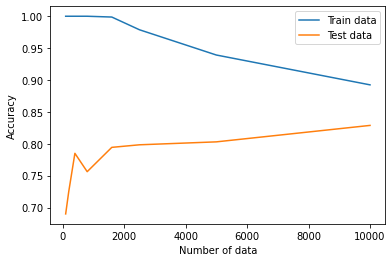

In [16]:
import matplotlib.pyplot as plt

plt.plot(number_data, training_accuracy_list, label='Train data')
plt.plot(number_data, test_accuracy_list, label='Test data')

plt.legend(loc='best')


plt.xlabel('Number of data')
plt.ylabel('Accuracy')

plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

number_data = [100, 200, 400, 800, 1600, 2500, 5000, 10000]
training_accuracy_list = []
test_accuracy_list = []
regression_model_list_regular = []



for n in number_data:
  print(n)
  selected_x_train = x_train_sk[:n]
  selected_y_train = y_train_sk[:n]

  selected_x_test = x_test_sk[:n]
  selected_y_test = y_test_sk[:n]

  print(selected_y_train[0].shape)
  LogisticRegr_r = LogisticRegression(penalty="l2", C=0.01)
  LogisticRegr_r.fit(selected_x_train, selected_y_train)

  score_test = LogisticRegr_r.score(selected_x_test, selected_y_test)
  score_train = LogisticRegr_r.score(selected_x_train, selected_y_train)
  training_accuracy_list.append(score_train)
  test_accuracy_list.append(score_test)
  regression_model_list_regular.append(LogisticRegr_r)





100
()
200
()
400
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


800
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1600
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2500
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


5000
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


10000
()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


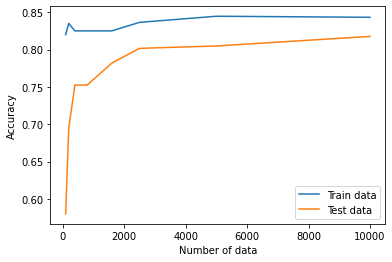

In [18]:
import matplotlib.pyplot as plt

plt.plot(number_data, training_accuracy_list, label='Train data')
plt.plot(number_data, test_accuracy_list, label='Test data')

plt.legend(loc='best')


plt.xlabel('Number of data')
plt.ylabel('Accuracy')

plt.show()

In [19]:
## Have regression_model_list_regular and regression_model_list


regular_attack_accuracy = []
attack_accuracy = []

for i in range(len(number_data)):
  n = number_data[i]
  selected_x_train = x_train_sk[:n]
  selected_y_train = y_train_sk[:n]

  selected_x_test = x_test_sk[:n]
  selected_y_test = y_test_sk[:n]

  selected_moded_normal = regression_model_list[i]
  selected_moded_regular = regression_model_list_regular[i]

  normal_pred_train = selected_moded_normal.score(selected_x_train,selected_y_train)
  normal_pred_test = selected_moded_normal.score(selected_x_test,selected_y_test)

  normal_attack = (normal_pred_train + (1-normal_pred_test)) / 2

  attack_accuracy.append(normal_attack)

  regular_pred_train = selected_moded_regular.score(selected_x_train,selected_y_train)
  regular_pred_test = selected_moded_regular.score(selected_x_test,selected_y_test)

  regular_attack = (regular_pred_train + (1-regular_pred_test)) / 2

  regular_attack_accuracy.append(regular_attack)






In [20]:
print(attack_accuracy)
print(regular_attack_accuracy)

[0.655, 0.6375, 0.6074999999999999, 0.621875, 0.6021875, 0.5902000000000001, 0.5681, 0.5318]
[0.62, 0.5700000000000001, 0.53625, 0.53625, 0.5215624999999999, 0.5174000000000001, 0.5199, 0.5127999999999999]


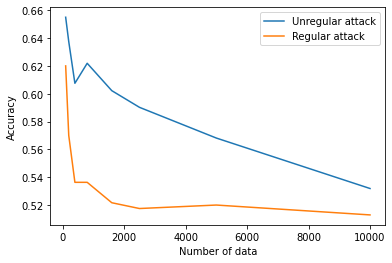

In [21]:
import matplotlib.pyplot as plt

plt.plot(number_data, attack_accuracy, label='Unregular attack')
plt.plot(number_data, regular_attack_accuracy, label='Regular attack')

plt.legend(loc='best')


plt.xlabel('Number of data')
plt.ylabel('Accuracy')

plt.show()

In [22]:
n = 400
variance_list = [x * 0.25 for x in range(21)]

selected_x_train = x_train_sk[:n]
selected_y_train = y_train_sk[:n]

selected_x_test = x_test_sk[:n]
selected_y_test = y_test_sk[:n]

normal_model_list_with_sigma = []
regular_model_list_with_sigma = []

accuracy_with_sgima_normal_train = []
accuracy_with_sgima_normal_test = []

accuracy_with_sgima_regular_train = []
accuracy_with_sgima_regular_test = []



for variance in variance_list:

  LogisticRegr = LogisticRegression(penalty="none")
  LogisticRegr.fit(selected_x_train, selected_y_train)

  LogisticRegr_r = LogisticRegression(penalty="l2", C=0.01)
  LogisticRegr_r.fit(selected_x_train, selected_y_train)

  for i in range(10):
    noise_1 = np.random.normal(0, variance, 784)
    LogisticRegr.coef_[i] = np.add(LogisticRegr.coef_[i], noise_1)

    noise_2 = np.random.normal(0, variance, 784)
    LogisticRegr_r.coef_[i] = np.add(LogisticRegr_r.coef_[i], noise_2)
  
  normal_model_list_with_sigma.append(LogisticRegr)
  regular_model_list_with_sigma.append(LogisticRegr_r)

  score_test = LogisticRegr.score(selected_x_test, selected_y_test)
  score_train = LogisticRegr.score(selected_x_train, selected_y_train)

  accuracy_with_sgima_normal_train.append(score_train)
  accuracy_with_sgima_normal_test.append(score_test)

  score_test = LogisticRegr_r.score(selected_x_test, selected_y_test)
  score_train = LogisticRegr_r.score(selected_x_train, selected_y_train)

  accuracy_with_sgima_regular_train.append(score_train)
  accuracy_with_sgima_regular_test.append(score_test)





  


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


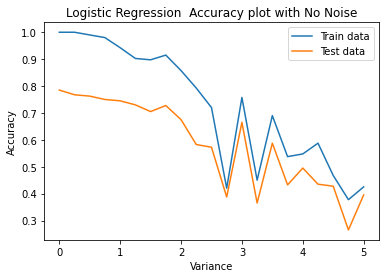

In [23]:
import matplotlib.pyplot as plt

plt.plot(variance_list, accuracy_with_sgima_normal_train, label='Train data')
plt.plot(variance_list, accuracy_with_sgima_normal_test, label='Test data')

plt.legend(loc='best')

plt.title('Logistic Regression  Accuracy plot with No Noise')

plt.xlabel('Variance')
plt.ylabel('Accuracy')

plt.show()

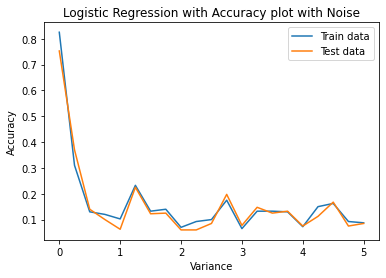

In [24]:
import matplotlib.pyplot as plt

plt.plot(variance_list, accuracy_with_sgima_regular_train, label='Train data')
plt.plot(variance_list, accuracy_with_sgima_regular_test, label='Test data')

plt.legend(loc='best')

plt.title('Logistic Regression with Accuracy plot with Noise')

plt.xlabel('Variance')
plt.ylabel('Accuracy')

plt.show()

In [25]:
## Have regression_model_list_regular and regression_model_list


regular_attack_accuracy_with_noise = []
attack_accuracy_with_noise = []

n = 400
variance_list = [x * 0.25 for x in range(21)]

selected_x_train = x_train_sk[:n]
selected_y_train = y_train_sk[:n]

selected_x_test = x_test_sk[:n]
selected_y_test = y_test_sk[:n]

for i in range(len(variance_list)):
  selected_moded_normal = normal_model_list_with_sigma[i]
  selected_moded_regular = regular_model_list_with_sigma[i]

  normal_pred_train = selected_moded_normal.score(selected_x_train,selected_y_train)
  normal_pred_test = selected_moded_normal.score(selected_x_test,selected_y_test)

  normal_attack = (normal_pred_train + (1-normal_pred_test)) / 2

  attack_accuracy_with_noise.append(normal_attack)

  regular_pred_train = selected_moded_regular.score(selected_x_train,selected_y_train)
  regular_pred_test = selected_moded_regular.score(selected_x_test,selected_y_test)

  regular_attack = (regular_pred_train + (1-regular_pred_test)) / 2

  regular_attack_accuracy_with_noise.append(regular_attack)






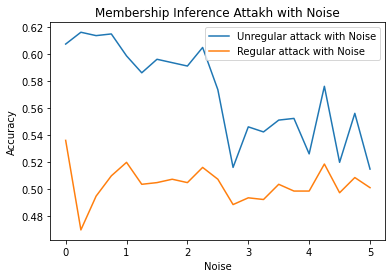

In [26]:
import matplotlib.pyplot as plt

plt.plot(variance_list, attack_accuracy_with_noise, label='Unregular attack with Noise')
plt.plot(variance_list, regular_attack_accuracy_with_noise, label='Regular attack with Noise')

plt.legend(loc='best')

plt.title("Membership Inference Attakh with Noise")
plt.xlabel('Noise')
plt.ylabel('Accuracy')

plt.show()